<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371 Homework 3

Group Partners: Brian Janger, Matthew Wang, Caleb Watson

### Problem 0 (3 points)

## Part 1: Gradient Descent with Analytic Line Search 

### Problem 1.1 (Exam Style)

Minimize $\phi(\alpha)=f(z_0 + \alpha p)$.

We want to find the solution of $\phi'(\alpha)=0$ for $\alpha$ nearest to 0. Let $z_0=$ $\begin{bmatrix}
1\\
1
\end{bmatrix}$

We will solve for
$\phi'(\alpha)=f'(z_0 - \alpha * \nabla f(z_0)) = 0$

$\nabla f$=  $\begin{bmatrix}
2cos(x^2y^2-1)xy^2\\
2cos(x^2y^2-1)x^2y
\end{bmatrix}$

$\nabla f(z_0)=$ $\begin{bmatrix}
2\\
2
\end{bmatrix}$

$\phi'(\alpha)=f'(\begin{bmatrix}
1-2\alpha\\
1-2\alpha
\end{bmatrix}) =0$

We then get

$f_x = 2cos((1-2\alpha)^4-1)(1-2\alpha)^3=0$

and

$f_y = 2cos((1-2\alpha)^4-1)(1-2\alpha)^3=0$

Both of these partials are the same! So we can evaluate one of them for $\alpha$ and be done.

By setting $(1-2\alpha)^3=0$, we get

$1-2\alpha = 0$

$\alpha = 1/2$

Note that there are other values of $\alpha$ that can be attained by solving the cosine term, but these values are either negative or larger than $\alpha = 0.5$.

Now doing the gradient descent step, taking $z_0$ and moving in the direction opposite the gradient:

$z_1 = -\alpha \nabla f(z_0) + z_0$

$z_1 = -\frac{1}{2} \begin{bmatrix} 2 \\ 2 \end{bmatrix} + \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$

$f(z_1) = f(\begin{bmatrix} 0 \\ 0 \end{bmatrix}) = \sin(-1) = -0.841$

### Problem 1.2

In [1]:
import numpy as np
from scipy import optimize

def line_search(f, g, z0): 
    x = optimize.golden(func=f, brack=(0., 1.e-3), full_output=True)
    alpha = x[0]
    phi_alp = x[1]
    z1 = z0 - alpha*g(z0)
    f1 = f(z1)
    return (z1, f1, x[2])

# defining functions and starting point from previous part
def f(x): return np.sin(x[0]**2*x[1]**2 - 1)
def g(x): return np.array([2*x[0]*x[1]**2*np.cos(x[0]**2*x[1]**2-1), 2*x[1]*x[0]**2*np.cos(x[0]**2*x[1]**2-1)])
def phi(x): return f(z0 - x*g(z0))

z0 = [1,1]
return_val = line_search(phi, g, z0)
with np.printoptions(precision=3, suppress=True):
    print("f({}) = {} -> f({}) = {} in {} evaluations".format(z0, f(z0), return_val[0], np.round(f(return_val[0]),3), return_val[2]))
                                             

f([1, 1]) = 0.0 -> f([0. 0.]) = -0.841 in 46 evaluations


### Problem 1.3 (Exam Style)

We are finding the first instance in which $\phi(\alpha)$ is equal to zero, unlike in the numerical approach in which the entire function space is considered when deciding the positions of $a, b,$ and $c$ in the bracketing triple. Essentially, the two approaches differ in their goal of finding a local versus global minimum.

If there's more than one local minimum in the bracket domain we provide, the numerical line search can find a different minimum, causing our results to appear inconsistent (when in reality, both are correct, we're just finding two different minima).

### Problem 1.4 (Exam Style)

We will examine the Gradient for $z_1=[0,0]$ and points around $z_1$

Plugging in for Gradient, we have $\nabla f(z_1) = [0,0]$

When doing the second derivative test, we get 0, which is inconclusive. We will look at points around the $z_0$. The points along $f(0,\epsilon)$ and $f(\epsilon,0)$ is also 0 (further inconclusive).

We will look at $f(p,\epsilon)$, $f(-p,\epsilon)$, $f(\epsilon, p)$, and $f(\epsilon, -p)$, where $p$ represents a small value. 


$\nabla f(p,\epsilon) = \begin{bmatrix} 2cos(p*\epsilon^2-1)p\epsilon^2 \\ 2cos(\epsilon^2-1)\epsilon \end{bmatrix}$, so the $f_x$ value is always positive and $f_y$ value has same sign as $\epsilon$.

When examining the other pairs, it has the same behavior, suggesting it is a minimum. 

When plotting the equation and making a contour map, we observe that $z_1$ is a minimum, confirming our analysis.

### Problem 1.5 (Exam Style)

The global minimum value $f(x,y) = sin(x^2y^2-1) = -1$, because the smallest value $sin$ can have is -1. 


$x^2y^2 - 1=3\pi/2 * 2\pi n$

$x^2y^2 = 3\pi/2 * 2\pi n + 1$

Plug in $\alpha$ for x and y, we get $(-2\alpha + 1)^4=3\pi/2 * 2\pi n + 1$

$\alpha=(1-(3\pi/2+2\pi n + 1)^{1/4})/2$

The first global minimum is at $\alpha_0=1.273$. The algebraic expression is the above $\alpha$ equation, just plug in 0 for $n$ since higher values of $n$ will be for different minima. 

$z_1=z_0 - \alpha * \nabla f(z_0)=\begin{bmatrix} -1.546 \\ -1.546 \end{bmatrix}$

$f(z_1) \approxeq -1$

### Problem 1.6 (Exam Style)
$z_1$ is a global minimum, but it is not the only global minimum. From our work in 1.5 above, we see that $\alpha$ depends on $n$, for which there are a countably infinite number of possible values. Therefore, there are other such points $z$ where $f(x,y)=-1$, since an infinite number of $n$ values means we have an infinite number of possible $\alpha$ values, which then equates to several global minimums for $f$.

## Part 2: Gradient Descent

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def paraboloid(z, axes):
    z2 = z * z
    p = axes[0] * z2[0] + axes[1] * z2[1]
    return p

In [4]:
def g_paraboloid(z, axes):
    g = 2 * z * axes
    return g

In [5]:
def make_bowl_functions(axes):
    def f(z):
        return paraboloid(z, axes)

    def g(z):
        return g_paraboloid(z, axes)

    return f, g

In [6]:
bowl, g_bowl = make_bowl_functions((0.1, 1.))

In [7]:
def show_function(p, x_range=(-1.2, 1.2), y_range=(-1.2, 1.2), n=101, levels=10):
    x = np.linspace(x_range[0], x_range[1], n)
    y = np.linspace(y_range[0], y_range[1], n)
    xx, yy = np.meshgrid(x, y)
    zz = np.stack((xx, yy), axis=0)
    pp = p(zz)
    plt.contour(x, y, pp, levels=levels)
    plt.plot(0., 0., '.', ms=8)
    plt.axis('square')
    plt.xticks([])
    plt.yticks([])

In [8]:
def draw_circle(center=(0., 0.), radius=1., samples=300, color='r'):
    omega = np.linspace(0., 2. * np.pi, samples)
    x, y = np.cos(omega), np.sin(omega)
    x = radius * x + center[0]
    y = radius * y + center[1]
    plt.plot(x, y, color=color)

### Problem 2.1

In [9]:
# function to implement different styles of gradient descent
def gradient_descent(
    f, g, z0,
    alpha=0.,
    momentum=0.,
    max_iterations=1000,
    min_gradient=1.e-6,
    min_step=1.e-8,
    stop_radius=0.01,
    record=False
):
    def phi(x): return f(z0 - x*g(z0))
    iterations = 1 # var to track the number of iterations
    evaluations = 0
    
    point_list = [(z0, f(z0))] # list of points and function values encountered during descent
    if alpha <= 0: # perform line search
        x = line_search(phi, g, z0) # returns (z1, f1, ne)
        z0_old=z0.copy()
        z0, fk, ne = x
        evaluations += ne
        point_list.append((z0, f(z0)))
        if np.linalg.norm(z0) >= stop_radius: 
            point_list.append((z0, f(z0)))
            while(np.linalg.norm(z0-z0_old) >= min_step 
              and np.linalg.norm(g(z0)) >= min_gradient
              and iterations <= max_iterations):
                x = line_search(phi, g, z0) # returns (z1, f1, ne)
                z0_old = z0.copy()        # old = z0
                z0, fk, ne = x            # new = zk
                evaluations += ne
                iterations += 1
                point_list.append((z0, f(z0)))
                if np.linalg.norm(z0) >= stop_radius: 
                    continue
                else: break   
                
    else:         # uses descent rate, alpha
        evaluations += 1
        v0=0
        if(momentum > 0):
            v1 = momentum*v0 - alpha*g(z0)
            v0 = v1
            z0_old = z0
            z0 = z0_old + v1 
        else: 
            z0_old = z0
            z0 = z0_old - alpha*g(z0_old)
        point_list.append((z0, f(z0)))
        if np.linalg.norm(z0) >= stop_radius: 
            while(np.linalg.norm(z0-z0_old) >= min_step 
              and np.linalg.norm(g(z0)) >= min_gradient
              and evaluations <= max_iterations):
                evaluations += 1
                if(momentum > 0):
                    v1 = momentum*v0 - alpha*g(z0)
                    v0 = v1
                    z0_old = z0
                    z0 = z0_old + v1
                else:
                    z0_old = z0
                    z0 = z0_old - alpha*g(z0_old)
                point_list.append((z0, f(z0)))
                if np.linalg.norm(z0) >= stop_radius: continue
                else: break
                
    if record is False: # return (zk, f(zk), total number of function evalutions)
        return(z0, f(np.array(z0)), evaluations)
        
    else: # return (zk, f(zk), total number of function evalutions, 
          # list of points and function values encountered during descent)
        return(z0, f(np.array(z0)), evaluations, point_list)

In [10]:
# show the paths traversed by gradient_descent on bowl using line search
def show_paths(alpha, momentum):
    k = 1
    plt.suptitle('Gradient descent of rate {} with momentum {}'.format(alpha, momentum))
    for x in range(0, 108, 18): 
        z = np.array([np.cos(x * (np.pi / 180)), np.sin(x * (np.pi / 180))])
        path = gradient_descent(bowl, g_bowl, z, alpha=alpha, momentum=momentum, record=True)[3]
        plt.subplot(2,3,k)
        plt.title('Angle $\omega$ = %d' % x)
        path_x = [x[0][0] for x in path]
        path_y = [x[0][1] for x in path]
        plt.plot(path_x, path_y, '-r')
        plt.plot(z[0], z[1], 'x', ms=12)
        k+=1
        show_function(bowl)
        draw_circle()

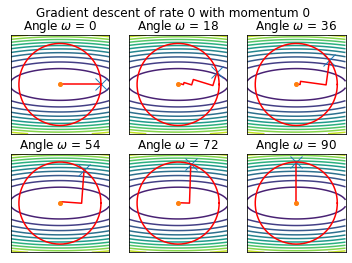

In [11]:
show_paths(alpha=0, momentum=0)

The above results appear consistent with what should be expected, as all paths begin at the various starting point with respect to $\omega$ and terminate near to the minimum value of our paraboloid $[0,0]$. For points that are directly above ($\omega = 0$) or adjacent ($\omega = 90$), the results show that the path is of step size 1 in either the x or y direction, respectively, and therefore the number of function evaluations is at a minimum at these angles $\omega$. 

### Problem 2.2

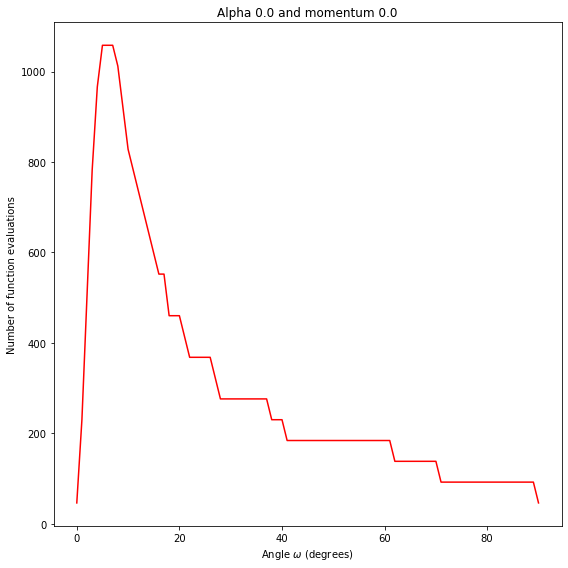

In [12]:
def show_evaluations(alpha=0., momentum=0.):
    eval_arr = []
    for x in range(0, 91):
        z = np.array([np.cos(x * (np.pi / 180)), np.sin(x * (np.pi / 180))])
        evaluations = gradient_descent(bowl, g_bowl, z, alpha=alpha, momentum=momentum, record=True)[2]    
        eval_arr.append((x, evaluations))
    eval_x = [x[0] for x in eval_arr]
    eval_y = [x[1] for x in eval_arr]
    plt.plot(eval_x, eval_y, '-r')
    plt.title('Alpha {} and momentum {}'.format(alpha, momentum))
    plt.xlabel('Angle $\omega$ (degrees)')
    plt.ylabel('Number of function evaluations')
    
plt.figure(figsize=(8, 8), tight_layout=True)
show_evaluations()
plt.show()

The above graph is consistent with our observations from the previous part, as we see a minimum number of function evaluations at the $\omega$ values corresponding to 0 and 90 degrees. As explained above, the paths originating from these respective $z_0$ vectors are derived from calling the line_search function once and recording the newly derived $z_k$, which is within the prescribed stop radius. Additionally, problem 2.1 showed that the number of function evaluations was greatest for $\omega$ of 18 degrees, which is also confirmed here by the peak centered around 10 degrees. 

### Problem 2.3

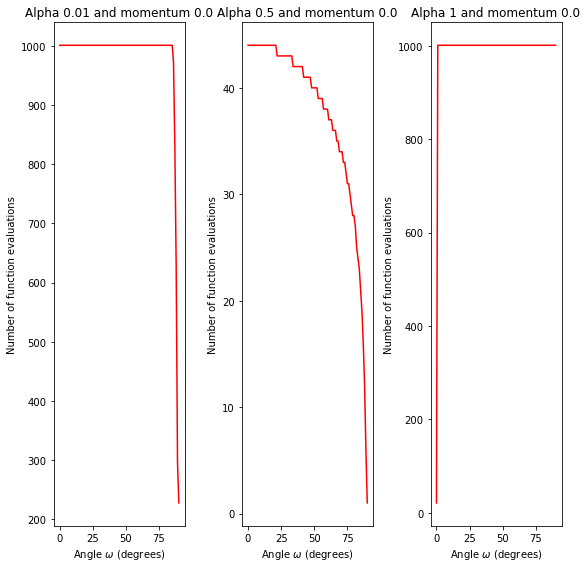

In [13]:
plt.figure(figsize=(8, 8), tight_layout=True)
i = 1
for x in [0.01, 0.5, 1]:
    plt.subplot(1, 3, i)
    show_evaluations(alpha=x)
    i+=1
plt.show()

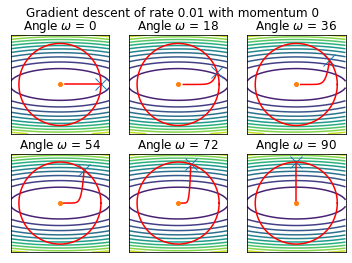

In [14]:
show_paths(alpha=0.01, momentum=0)

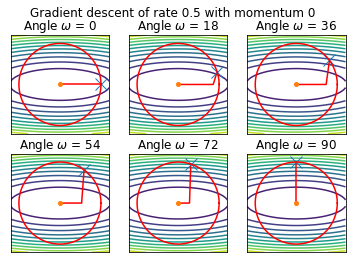

In [15]:
show_paths(alpha=0.5, momentum=0)

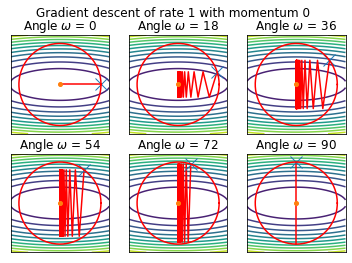

In [16]:
show_paths(alpha=1, momentum=0)

When the descent rates are very large or small, the number of function evaluations is much larger. In the case of a rate of $\alpha$ = 1, this is due to the fact that our step size is remaining unchanged and therefore our path overshoots and appears to oscillate as it approaches the minimum value. On the other hand, when the rate $\alpha$ is 0.01, the step size is so small that the path no longer appears linear as shown in the previous problem. 

In general, with $\alpha$ = 0.5, the maximum number of function evaluations (~45) is equal to the minimum evaluations found at $\omega$ of 0 and 90 when using the line search method. 

### Problem 2.4

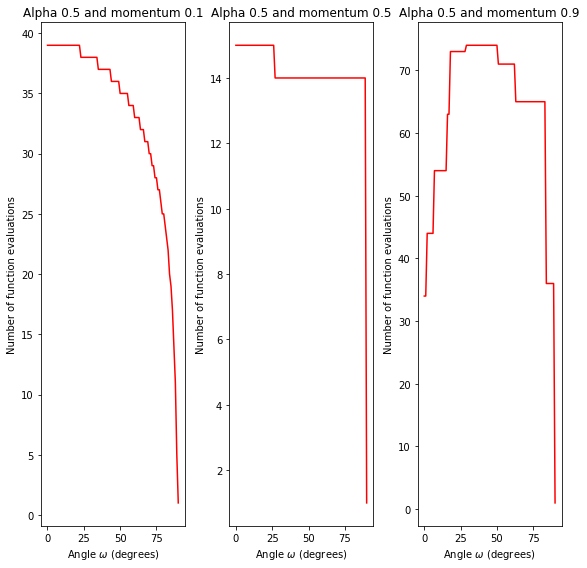

In [17]:
plt.figure(figsize=(8, 8), tight_layout=True)
i = 1
for x in [0.1, 0.5, 0.9]:
    plt.subplot(1, 3, i)
    show_evaluations(alpha=0.5, momentum=x)
    i+=1
plt.show()

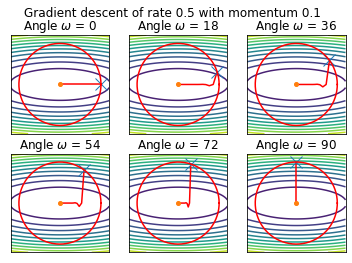

In [18]:
show_paths(alpha=0.5, momentum=0.1)

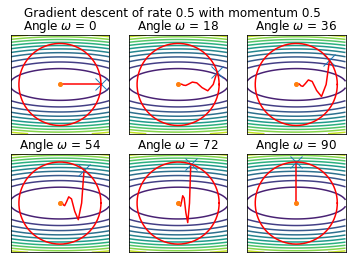

In [19]:
show_paths(alpha=0.5, momentum=0.5)

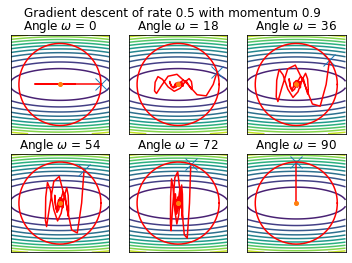

In [20]:
show_paths(alpha=0.5, momentum=0.9)

For problem 2.4, we can asseses the effects of varying momentum values ($\mu_k$) for a given descent rate 0.5. By increasing the momentum value, we are accelerating this descent. This method is very useful when the gradient magnitude becomes increasingly smaller as the minimum value is approached, avoiding shallow regions where newly found points stagger. However, increasing the value of $\mu_k$ past a certain value, as shown in the last two plots of $\mu_k$ = 0.5 and 0.9, results in the added velocity derived from $\mu_k$ pushing the path past the minimum value. This can be seen by the rebounds shown in the above graphs where the new point $z_k$ ends up past the minimum point of the parabaloid. However, there are apparent advantages to using this method with acceptable values for $\mu_k$, as we end up decreasing the number of required function evaluations. 